In [4]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network import NeuralNetwork, sigmoid, sigmoid_prime, MSELoss, MSELoss_prime

## Sigmoide
<img src="Imagens/sigmoid.png" alt="Função Sigmoid"
     style="height: 350px; width: 600px;"/>

In [ ]:
def sigmoid(x: np.ndarray):
    '''Função sigmoid'''
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x: np.ndarray):
    '''Derivada da função sigmoid'''
    return sigmoid(x) * (1-sigmoid(x))

In [6]:
def MSELoss(y_hat, y):
    return np.sum((y_hat - y)**2)/len(y_hat)


def MSELoss_prime(y_hat, y):
    return 2/len(y_hat)*(y_hat - y)

In [7]:
lr = 0.3
nn = NeuralNetwork(2, lr)
nn.append_layer(2, bias=1, activation=sigmoid, activation_prime=sigmoid_prime)
nn.append_layer(1, bias=1, activation=sigmoid, activation_prime=sigmoid_prime)

X = np.array([[0,0], [1, 0], [1, 1], [0, 1]])
y = np.array([0, 1, 0, 1])

Epoch 100 - Loss: 1.0658391161935377
Epoch 200 - Loss: 1.059995068593886
Epoch 300 - Loss: 1.0550209963619233
Epoch 400 - Loss: 1.0488785255545183
Epoch 500 - Loss: 1.034771743636276
Epoch 600 - Loss: 0.9877584101456942
Epoch 700 - Loss: 0.8939399274717182
Epoch 800 - Loss: 0.8135365866170756
Epoch 900 - Loss: 0.770516792380298
Epoch 1000 - Loss: 0.7476768065013096


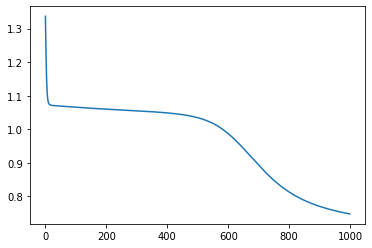

In [8]:
losses = []

for epoch in range(1000):
    total_loss = 0
    for x, y0 in zip(X, y):
        predicted = nn.forward(x.reshape(1,-1))
        loss = MSELoss(predicted, y0)
        loss_derivative = MSELoss_prime(predicted, y0)
        nn.backward(loss_derivative)
        total_loss += loss
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1} - Loss: {total_loss}")
    losses.append(total_loss)

plt.plot(losses)
plt.show()

In [9]:
def predict():
    i1 = int(input())
    i2 = int(input())
    predicted = nn.forward([i1, i2])
    print(f"Entrada: {i1}, {i2}\nXOR: {round(predicted[0][0])}")

In [10]:
predict()

1
0
Entrada: 1, 0
XOR: 1
